In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import statsmodels.formula.api as smf
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
movies = pd.read_csv("IMDB_Movies.csv")

In [3]:
movies.drop_duplicates(inplace=True)

In [147]:
movies.drop(['Unnamed: 0'], axis=1, inplace=True)

In [149]:
movies.columns

Index(['movie', 'imdb', 'votes', 'mpaa', 'genre', 'director', 'writer',
       'actor', 'country', 'budget', 'box_office_wknd1', 'box_office_dom',
       'box_office_gross', 'prod_company', 'runtime'],
      dtype='object')

In [150]:
movies.drop_duplicates(subset=['movie'],inplace=True)

In [28]:
movies

,movie,imdb,votes,mpaa,genre,director,writer,actor,country,budget,box_office_wknd1,box_office_dom,box_office_gross,prod_company,runtime
0,The Invisible Man,7.1,136012.0,R,Horror,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000.0,28205665.0,64914050.0,130722137.0,Universal Pictures,124.0
1,On the Basis of Sex,7.1,23877.0,PG-13,Biography,Mimi Leder,Daniel Stiepleman,Felicity Jones,USA,20000000.0,686355.0,24704837.0,38755900.0,Alibaba Pictures,120.0
2,The Gentlemen,7.9,188297.0,R,Action,Guy Ritchie,Guy Ritchie,Matthew McConaughey,UK,22000000.0,10651884.0,36471795.0,115171795.0,STX Films,113.0
3,Knives Out,7.9,394738.0,PG-13,Comedy,Rian Johnson,Rian Johnson,Daniel Craig,USA,40000000.0,26769548.0,165363234.0,309232797.0,Lionsgate,130.0
4,Bastille Day,6.3,36373.0,R,Action,James Watkins,Andrew Baldwin,Idris Elba,UK,20000000.0,41546.0,50269.0,14857808.0,StudioCanal,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Blood Diamond,8.0,491451.0,R,Adventure,Edward Zwick,Charles Leavitt,Leonardo DiCaprio,USA,100000000.0,8648324.0,57377916.0,171720398.0,Warner Bros.,143.0
926,The Bourne Ultimatum,8.0,598807.0,PG-13,Action,Paul Greengrass,Tony Gilroy,Matt Damon,USA,110000000.0,69283690.0,227471070.0,444100035.0,Universal Pictures,115.0
927,Before Sunset,8.1,230370.0,R,Drama,Richard Linklater,Richard Linklater,Ethan Hawke,USA,2700000.0,219425.0,5820649.0,15936507.0,Warner Independent Pictures (WIP),80.0
928,Dancer in the Dark,8.0,100469.0,R,Crime,Lars von Trier (as Lars Von Trier),Lars von Trier,Björk,Denmark,12800000.0,91612.0,4184036.0,40031879.0,Zentropa Entertainments,140.0


In [151]:
nfeatures = ['runtime', 'budget', 'box_office_dom', 'votes', 'box_office_wknd1', 'box_office_gross']

In [152]:
movies.corr()

,imdb,votes,budget,box_office_wknd1,box_office_dom,box_office_gross,runtime
imdb,1.000000,0.579219,0.263970,0.262763,0.371759,0.349252,0.511947
votes,0.579219,1.000000,0.452995,0.482004,0.588393,0.568670,0.519952
budget,0.263970,0.452995,1.000000,0.760446,0.743985,0.796032,0.409851
box_office_wknd1,0.262763,0.482004,0.760446,1.000000,0.945676,0.928101,0.325137
box_office_dom,0.371759,0.588393,0.743985,0.945676,1.000000,0.956646,0.361239
box_office_gross,0.349252,0.568670,0.796032,0.928101,0.956646,1.000000,0.378249
runtime,0.511947,0.519952,0.409851,0.325137,0.361239,0.378249,1.000000


In [153]:
movies_df = movies.copy()

In [154]:
movies_df2 = movies.copy()

### Feature: Votes
### Target: IMDB Rating

Based on the correlation map, use the feature Votes which seems to be highly correlated to the IMDB score and build a Stats model

In [155]:
y = movies_df['imdb']
x = movies_df['votes']
x = sm.add_constant(x)

In [156]:
model = sm.OLS(y, x, data=movies_df)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   imdb   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     468.5
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.97e-84
Time:                        14:03:12   Log-Likelihood:                -1207.1
No. Observations:                 930   AIC:                             2418.
Df Residuals:                     928   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0480      0.034    178.991      0.0

R-Squared of the model: 0.335

The coefficient estimate for the Votes column is 2.49e-06 which means that as the Budget increases, the IMDB rating will also increase.

In [157]:
y = movies_df['imdb']
x = movies_df['runtime']
x = sm.add_constant(x)

In [158]:
model = sm.OLS(y, x, data=movies_df)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   imdb   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     329.6
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           2.89e-63
Time:                        14:03:24   Log-Likelihood:                -1255.8
No. Observations:                 930   AIC:                             2516.
Df Residuals:                     928   BIC:                             2525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0494      0.188     16.205      0.0

Try adding all the numeric features to the model and test it

In [42]:
y = movies_df['imdb']
x = movies_df[nfeatures]
x = sm.add_constant(x)

In [43]:
model = sm.OLS(y, x, data=movies_df)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   imdb   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          2.09e-108
Time:                        11:18:51   Log-Likelihood:                -1137.4
No. Observations:                 930   AIC:                             2289.
Df Residuals:                     923   BIC:                             2323.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.1098      0.188  

#### Remove features that have high p-value which is 'box_office_gross'

In [44]:
y = movies_df['imdb']
x = movies_df[['runtime', 'budget', 'box_office_wknd1', 'box_office_dom', 'votes']]
x = sm.add_constant(x)

model = sm.OLS(y, x, data=movies_df)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   imdb   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     138.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          1.69e-109
Time:                        11:19:39   Log-Likelihood:                -1137.4
No. Observations:                 930   AIC:                             2287.
Df Residuals:                     924   BIC:                             2316.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.1107      0.187  

In [45]:
vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] =[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,vif
0,const,47.922170
1,runtime,1.460373
2,budget,2.564726
3,box_office_wknd1,11.170442
4,box_office_dom,12.142365
5,votes,1.998335


 VIF or the Variance Inflation factor seems to be very high for the variables 'box_office_wknd1' and 'box_office_dom' as both of them are variables capturing similar data which is the box office performance. Let's try to take the mean of them to eliminate collinearity.

In [46]:
movies_df['box_office_avg']= (movies_df['box_office_wknd1'] + movies_df['box_office_dom'])/2

In [53]:
y = movies_df['imdb']
x = movies_df[['runtime', 'budget', 'box_office_avg', 'votes']]
x = sm.add_constant(x)

model = sm.OLS(y, x, data=movies_df)
fit = model.fit()
print(fit.summary())

residuals = fit.predict(x) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print('RMSE of the model: {:.4f}'.format(rmse))

mae = sum(abs(fit.predict(x) - y))/len(y)
print('Mean Absolute Error of the model: {:.4f}'.format(mae))

                            OLS Regression Results                            
Dep. Variable:                   imdb   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          6.13e-102
Time:                        11:23:40   Log-Likelihood:                -1157.6
No. Observations:                 930   AIC:                             2325.
Df Residuals:                     925   BIC:                             2349.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1510      0.191     21.

In [48]:
vif = pd.DataFrame()
vif['variables'] = x.columns
vif['vif'] =[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,vif
0,const,47.868203
1,runtime,1.460010
2,budget,2.469562
3,box_office_avg,2.766702
4,votes,1.786231


Even though the VIF seems better for the variables, but the R-squared value seems to have dropped from 0.428 to 0.403. For the sake of predictive accuracy it is okay to keep the 2 collinear features if that gives a better model performance.

Refit the model with the original values instead of the mean

In [49]:
y = movies_df['imdb']
x = movies_df[['runtime', 'budget', 'box_office_wknd1', 'box_office_dom', 'votes']]
x = sm.add_constant(x)

model = sm.OLS(y, x, data=movies_df)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   imdb   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     138.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          1.69e-109
Time:                        11:21:27   Log-Likelihood:                -1137.4
No. Observations:                 930   AIC:                             2287.
Df Residuals:                     924   BIC:                             2316.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.1107      0.187  

In [52]:
residuals = fit.predict(x) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print('RMSE of the model: {:.4f}'.format(rmse))

mae = sum(abs(fit.predict(x) - y))/len(y)
print('Mean Absolute Error of the model: {:.4f}'.format(mae))

RMSE of the model: 0.8220
Mean Absolute Error of the model: 0.6144


Both MAE and RMSE went down as the model got better at fitting most of the data.

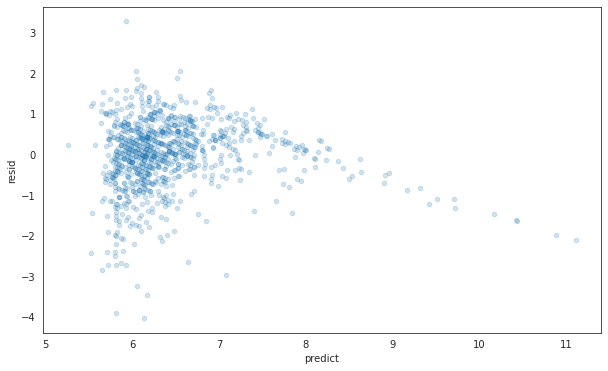

In [54]:
movies_df['predict']=fit.predict(x)
movies_df['resid']=movies_df['imdb']-movies_df['predict']

with sns.axes_style('white'):
    plot=movies_df.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

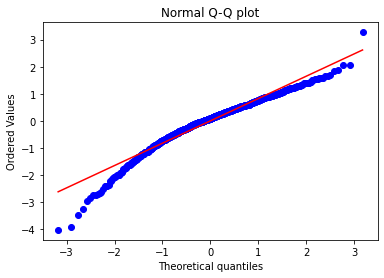

In [55]:
stats.probplot(movies_df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Looking at the Q-Q plot, the dots seems to be close to the red line in the center but with a light tail. 

R^2 value reduced and also the Q-Q plot and Residuals don't seem to get any better.

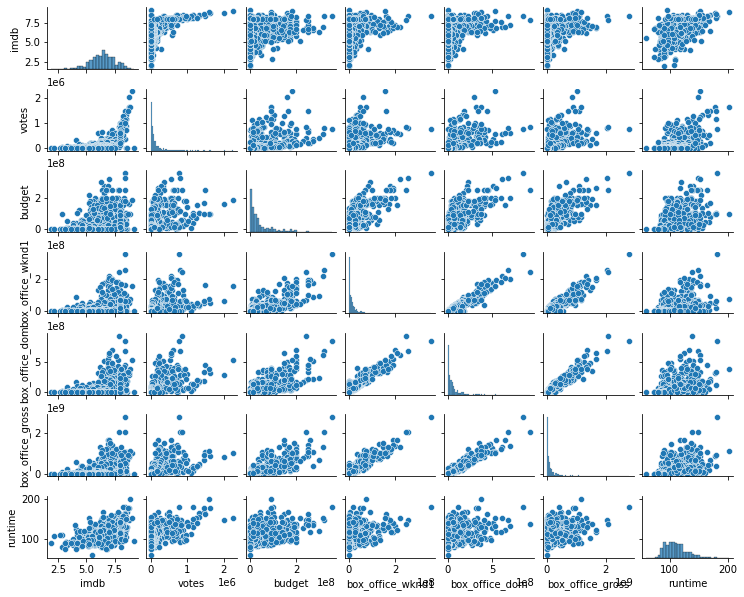

In [56]:
sns.pairplot(movies, height=1.2, aspect=1.25)

### Build a baseline Linear Regression model using the Votes feature

In [159]:
y = movies_df2['imdb']
X = movies_df2[['votes']]

In [160]:
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.4f}'.format(lr.score(X, y)))

R-squared: 0.3355


### Add all the numeric features and fit the model

In [161]:
X, y = movies_df2[nfeatures], movies_df2['imdb']

In [162]:
lr = LinearRegression()
lr.fit(X, y)
print('R-squared: {:.4f}'.format(lr.score(X, y)))

R-squared: 0.4280


R-squared after adding all the numeric features seems better

### Prepare all the categorical variables by choosing the most common values for them and adding dummy values to the features

In [163]:
genre_count = movies_df2['genre'].value_counts()
other_genre = list(genre_count[genre_count<40].index)
movies_df2['genre'] = movies_df2['genre'].replace(other_genre, 'Other genres')

In [164]:
director_count = movies_df2['director'].value_counts()
other_d = list(director_count[director_count<3].index)
movies_df2['director'] = movies_df2['director'].replace(other_d, 'Other Directors')

In [165]:
actor_count = movies_df2['actor'].value_counts()
other_a = list(actor_count[actor_count<5].index)
movies_df2['actor'] = movies_df2['actor'].replace(other_a, 'Other Actors')

In [166]:
prodc_count = movies_df2['prod_company'].value_counts()
other_pc = list(prodc_count[prodc_count<10].index)
movies_df2['prod_company'] = movies_df2['prod_company'].replace(other_pc, 'Other Companies')

In [167]:
writer_count = movies_df2['writer'].value_counts()
other_w = list(writer_count[writer_count<3].index)
movies_df2['writer'] = movies_df2['writer'].replace(other_a, 'Other Writers')

In [168]:
movies_df2.drop('country', axis=1, inplace=True)

In [169]:
cfeatures = ['genre', 'director', 'writer', 'actor', 'mpaa', 'prod_company']

In [170]:
feature_df = pd.get_dummies(movies_df2,
                     columns = cfeatures, drop_first=True)

In [172]:
feature_df.head(5)

,movie,imdb,votes,budget,box_office_wknd1,box_office_dom,box_office_gross,runtime,genre_Adventure,genre_Animation,...,prod_company_Metro-Goldwyn-Mayer (MGM),prod_company_New Line Cinema,prod_company_Other Companies,prod_company_Paramount Pictures,prod_company_Screen Gems,prod_company_Summit Entertainment,prod_company_Twentieth Century Fox,prod_company_Universal Pictures,prod_company_Walt Disney Pictures,prod_company_Warner Bros.
0,The Invisible Man,7.1,136012.0,7000000.0,28205665.0,64914050.0,130722137.0,124.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,On the Basis of Sex,7.1,23877.0,20000000.0,686355.0,24704837.0,38755900.0,120.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,The Gentlemen,7.9,188297.0,22000000.0,10651884.0,36471795.0,115171795.0,113.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Knives Out,7.9,394738.0,40000000.0,26769548.0,165363234.0,309232797.0,130.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bastille Day,6.3,36373.0,20000000.0,41546.0,50269.0,14857808.0,92.0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train/Test/Validate

In [173]:
X = feature_df.drop(columns=['movie','imdb'])
y = feature_df['imdb']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [174]:
model = LinearRegression()
lr = model.fit(X_train,y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_val = lr.score(X_val, y_val)

lr.fit(X_train, y_train)

print(f'Linear Regression Validation R-squared: {r_squared_val:.3f}')
print(f'Linear Regression Train R-squared: {r_squared_train:.3f}')

Linear Regression Validation R-squared: 0.122
Linear Regression Train R-squared: 0.983


R-squared for the train data seems to be very high and the performance on validation is not matching up which means there is overfitting. Let's try a Ridge model and test it.

In [175]:
#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_reg = Ridge(alpha=1)
lr_reg.fit(X_train_scaled, y_train);

In [176]:
test_set_pred = lr_reg.predict(X_test_scaled)

In [177]:
print('Ridge R-squared: {:.4f}'.format(r2_score(y_test, test_set_pred)))

Ridge R-squared: 0.2055


Ridge R-squared values seem better than the Simple Linear Regression model

In [178]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

print('Mean Absolute Error of the Ridge model: {:.4f}'.format(mae(y_test, test_set_pred)))

Mean Absolute Error of the Ridge model: 0.7794


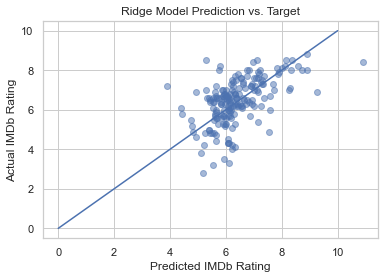

In [179]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,10), np.linspace(0,10))
plt.title('Ridge Model Prediction vs. Target')
plt.xlabel('Predicted IMDb Rating')
plt.ylabel('Actual IMDb Rating');

In [180]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))

    pred = x

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")


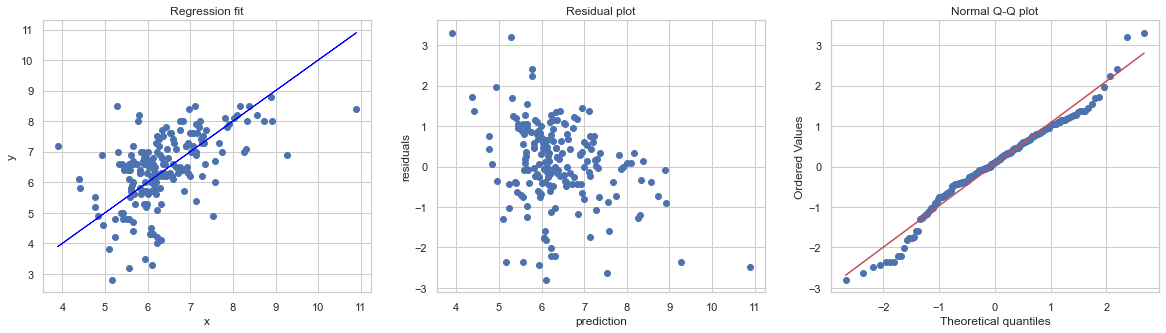

In [181]:
diagnostic_plot(test_set_pred, y_test)

Looking at the regression fit there seems to be a few outliers.

Create a residuals column to see the overpredicted and underpredicted movies

In [182]:
X = feature_df.drop(columns=['movie','imdb'])
y = feature_df['imdb']

X_scaled = scaler.fit_transform(X)
X_predicted = lr_reg.predict(X_scaled)

In [183]:
feature_df['res'] = X_predicted - feature_df['imdb']

In [184]:
# Calculate the top 5 underpredicted movies
underpredicted = feature_df['res'].sort_values().head(5).index.tolist()

print(feature_df['res'].sort_values().head(5))

869   -3.346463
712   -3.243827
924   -2.613341
877   -2.123059
262   -2.016331
Name: res, dtype: float64


In [185]:
index = feature_df.loc[underpredicted].index.tolist()
print(feature_df.iloc[index, 0])

869                                Bright Ones
712    Disney's Newsies: The Broadway Musical!
924                          The King's Speech
877                             Shutter Island
262                             The Dark Tower
Name: movie, dtype: object


In [186]:
feature_df.iloc[869, 0:9]

movie               Bright Ones
imdb                        7.2
votes                      25.0
budget                 600000.0
box_office_wknd1       165627.0
box_office_dom         165627.0
box_office_gross       165627.0
runtime                    82.0
genre_Adventure               0
Name: 869, dtype: object

In [187]:
# Calculate the top 5 underpredicted movies
overpredicted = feature_df['res'].sort_values().tail(10).index.tolist()
feature_df['res'].sort_values().tail(10)

711    1.998538
839    2.202427
873    2.209639
44     2.245927
605    2.337911
844    2.351785
672    2.415616
720    2.514955
828    2.774655
870    2.835864
Name: res, dtype: float64

In [188]:
index = feature_df.loc[overpredicted].index.tolist()
print(feature_df.iloc[index, 0])

711    Jem and the Holograms
839                    Union
873         Django Unchained
44      Fifty Shades of Grey
605          Black Christmas
844               The Church
672    Fifty Shades of Black
720               Proud Mary
828             L.A. Slasher
870                Inception
Name: movie, dtype: object


Underpredicted movies seem to have a less number of votes when compared to the overpredicted movies, let's try removing movies that have votes < 2000.

Looking at the ratings of overpredicted movies, "Fifty Shades of Black", "Black Christmas" were projected to gross 10-12 million at the box office but they didn't perform well which could be a reason why the model also predicted higher ratings for them. However they didn't get good critical response.

In [190]:
feature_df.drop(labels='res',axis=1,inplace=True)

In [193]:
feature_df1 = feature_df[feature_df["votes"]>2000]

In [196]:
feature_df1

,movie,imdb,votes,budget,box_office_wknd1,box_office_dom,box_office_gross,runtime,genre_Adventure,genre_Animation,...,prod_company_Metro-Goldwyn-Mayer (MGM),prod_company_New Line Cinema,prod_company_Other Companies,prod_company_Paramount Pictures,prod_company_Screen Gems,prod_company_Summit Entertainment,prod_company_Twentieth Century Fox,prod_company_Universal Pictures,prod_company_Walt Disney Pictures,prod_company_Warner Bros.
0,The Invisible Man,7.1,136012.0,7000000.0,28205665.0,64914050.0,130722137.0,124.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,On the Basis of Sex,7.1,23877.0,20000000.0,686355.0,24704837.0,38755900.0,120.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,The Gentlemen,7.9,188297.0,22000000.0,10651884.0,36471795.0,115171795.0,113.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Knives Out,7.9,394738.0,40000000.0,26769548.0,165363234.0,309232797.0,130.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bastille Day,6.3,36373.0,20000000.0,41546.0,50269.0,14857808.0,92.0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Blood Diamond,8.0,491451.0,100000000.0,8648324.0,57377916.0,171720398.0,143.0,1,0,...,0,0,0,0,0,0,0,0,0,1
926,The Bourne Ultimatum,8.0,598807.0,110000000.0,69283690.0,227471070.0,444100035.0,115.0,0,0,...,0,0,0,0,0,0,0,1,0,0
927,Before Sunset,8.1,230370.0,2700000.0,219425.0,5820649.0,15936507.0,80.0,0,0,...,0,0,1,0,0,0,0,0,0,0
928,Dancer in the Dark,8.0,100469.0,12800000.0,91612.0,4184036.0,40031879.0,140.0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Let's try validating the Simple LR and the Ridge models using a K Fold cross validation approach.

In [215]:
X = feature_df1.drop(columns=['movie','imdb'])
y = feature_df1['imdb']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X, y = np.array(X), np.array(y)
lr = LinearRegression()

In [216]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val).round(3))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val).round(3))

print(f'Simple scores: \t{cv_lm_r2s}')
print(f'Ridge scores: \t{cv_lm_reg_r2s} \n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple scores: 	[-0.152, -1.766, -0.189, -1.595, -0.538]
Ridge scores: 	[0.202, -0.702, 0.018, -0.278, -0.025] 

Simple mean cv r^2: -0.848 +- 0.695
Ridge mean cv r^2: -0.157 +- 0.313


In [217]:
coef_zip = list(zip(feature_df1.iloc[:,2:].columns.tolist(), lm_reg.coef_))
sorted_coef = sorted(coef_zip, key = lambda x: abs(x[1]))

In [218]:
sorted_coef[:-10:-1]

[('votes', 0.47628374309075583),
 ('runtime', 0.35033905317665526),
 ('director_Tom Hooper', -0.3034173004661611),
 ('box_office_dom', 0.3011277935192327),
 ('box_office_wknd1', -0.2912215954264794),
 ('prod_company_Columbia Pictures', -0.26589599004264386),
 ('actor_Will Smith', 0.1995965276597922),
 ('genre_Drama', -0.19814973643409006),
 ('mpaa_PG', 0.18196445272399342)]

In [219]:
plot_name = [name[0].title() for name in sorted_coef[:-10:-1]]
plot_coef = [coef[1] for coef in sorted_coef[:-10:-1]]
colors = [0 if c>=0 else 1 for c in plot_coef]

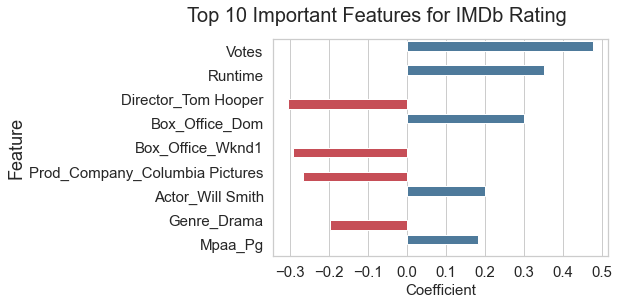

In [220]:
sns.set_theme(style="whitegrid")
cmap = sns.diverging_palette(240, 10, n=2)
movie_coef = sns.barplot(
    y=plot_name,
    x=plot_coef,
    hue=colors,
    palette=cmap,
    orient='h',
    )
movie_coef.set_title('Top 10 Important Features for IMDb Rating',fontsize=20,y=1.05, x=0.31)
movie_coef.get_legend().set_visible(False)
movie_coef.set_xlabel('Coefficient',fontsize=15)
movie_coef.set_ylabel('Feature',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Try using a LASSO regularization approach

In [221]:
X = feature_df1.drop(columns=['movie','imdb'])
y = feature_df1['imdb']

In [222]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

In [223]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values);

In [224]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [225]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [226]:
lasso_model.alpha_

0.08026433522257174

In [227]:
list(zip(X_train.columns, lasso_model.coef_))

[('votes', 0.4114704593736523),
 ('budget', -0.0),
 ('box_office_wknd1', 0.0),
 ('box_office_dom', 0.0),
 ('box_office_gross', 0.0),
 ('runtime', 0.23854995691835673),
 ('genre_Adventure', -0.0),
 ('genre_Animation', 0.04097327703931222),
 ('genre_Biography', 0.09939650364978399),
 ('genre_Comedy', -0.0),
 ('genre_Crime', 0.0),
 ('genre_Drama', 0.0),
 ('genre_Horror', -0.057256382373014295),
 ('genre_Other genres', 0.0),
 ('director_Antoine Fuqua', 0.0),
 ('director_Bill Condon', 0.0),
 ('director_Brad Bird', -0.0),
 ('director_Brad Peyton', -0.0),
 ('director_Christopher Landon', 0.0),
 ('director_Christopher Nolan', -0.0),
 ('director_Clint Eastwood', -0.0),
 ('director_Damien Chazelle', 0.0),
 ('director_Darren Aronofsky', 0.0),
 ('director_David F. Sandberg', 0.0),
 ('director_David Gordon Green', 0.0),
 ('director_David Leitch', 0.0),
 ('director_David Yates', -0.0),
 ('director_Denis Villeneuve', 0.0),
 ('director_Deon Taylor', 0.0),
 ('director_Eli Roth', 0.0),
 ('director_F. Ga

In [228]:
coef_zip = list(zip(feature_df1.iloc[:,2:].columns.tolist(), lasso_model.coef_))
sorted_coef = sorted(coef_zip, key = lambda x: abs(x[1]))

In [229]:
sorted_coef[:-10:-1]

[('votes', 0.4114704593736523),
 ('runtime', 0.23854995691835673),
 ('genre_Biography', 0.09939650364978399),
 ('genre_Horror', -0.057256382373014295),
 ('writer_Tony Leondis', -0.045281630573857805),
 ('genre_Animation', 0.04097327703931222),
 ('writer_Malcolm T. Goldman', -0.039046775258481055),
 ('writer_David Birke', -0.033776669741914685),
 ('writer_Sophia Takal', -0.03198140582369211)]

In [230]:
plot_name = [name[0].title() for name in sorted_coef[:-10:-1]]
plot_coef = [coef[1] for coef in sorted_coef[:-10:-1]]
colors = [0 if c>=0 else 1 for c in plot_coef]

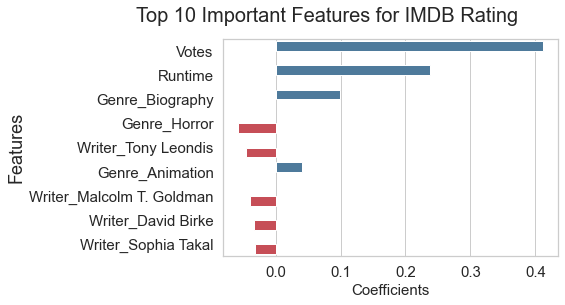

In [231]:
sns.set_theme(style="whitegrid")
cmap = sns.diverging_palette(240, 10, n=2)
movie_coef = sns.barplot(
    y=plot_name,
    x=plot_coef,
    hue=colors,
    palette=cmap,
    orient='h',
    )
movie_coef.set_title('Top 10 Important Features for IMDB Rating',fontsize=20,y=1.05, x=0.31)
movie_coef.get_legend().set_visible(False)
movie_coef.set_xlabel('Coefficients',fontsize=15)
movie_coef.set_ylabel('Features',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [232]:
test_set_pred = lasso_model.predict(X_te)

In [140]:
print('Mean Absolute Error: {:.4f}'.format(mae(y_test, test_set_pred)))

print('R Squared Error: {:.4f}'.format(r2_score(y_test, test_set_pred)))

Mean Absolute Error: 0.4397
R Squared Error: 0.6532


In [233]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))

    pred = x

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

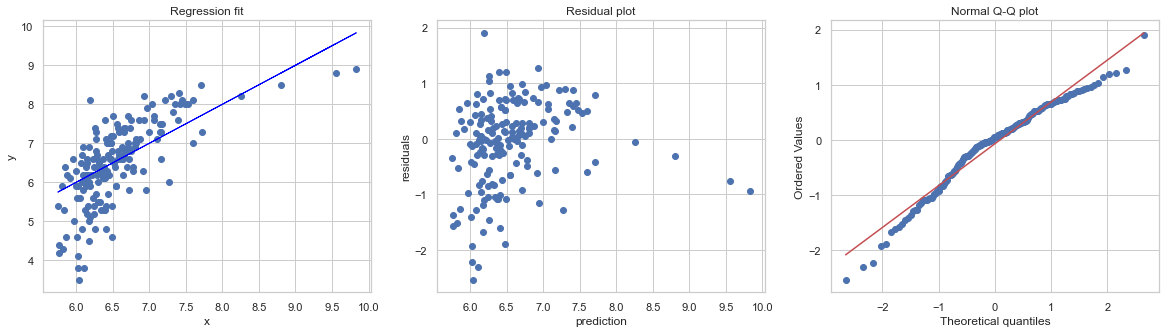

In [234]:
diagnostic_plot(test_set_pred, y_test)

### Conclusion

Lasso regression model seems to have a good R-squared. So this seems to be the best option when compared to others. Votes, Runtime seem to be main features and also Biography, Animation movies seem to do better. Horror movies seem to have a negative impact on the IMDB score.